### **Exercise: Multi-class Document Classification using Naive Bayes**

### Problem Statement

* We will build a document classification system for a news agency. 

* The goal is to automatically categorize news articles into one of five categories: `business`, `entertainment`, `politics`, `sport`, or `tech`.

* This is a multi-class classification problem. 

* We will use the **BBC Full Text Document Classification** dataset from Kaggle. 

* This dataset is excellent for demonstrating Naive Bayes because it contains both text and categorical features, allowing us to compare the performance of `MultinomialNB` (ideal for text) and `GaussianNB` (ideal for continuous features).

### Tasks to be Performed

1.  **Data Loading and Exploration**: Load the dataset and perform a basic exploratory data analysis to understand its structure and content.
2.  **MultinomialNB Implementation**: 
    * Preprocess the text data using `CountVectorizer` to convert it into a numerical format suitable for `MultinomialNB`.
    * Train a `MultinomialNB` model on the text data.
    * Evaluate the model's performance using a classification report and a confusion matrix.
3.  **GaussianNB Implementation**: 
    * Engineer a numerical feature from the text data (e.g., text length).
    * Train a `GaussianNB` model on this new numerical feature.
    * Evaluate its performance and compare it with the MultinomialNB model.
4.  **Manual Prediction**: Perform manual predictions on new, unseen articles to test the models in a real-world scenario.
5.  **Summary and Insights**: Provide a summary of the findings, including which model performed better and why, and discuss the suitability of each algorithm for this type of problem.

---

### Step 1: Import necessary libraries, Load and Explore the Dataset

* First, import the necessary libraries then we'll load and explore the dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load the dataset. You need to download it from Kaggle first.
* Dataset URL: https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset

* This is text document classification dataset which contains 2225 text data and five categories of documents. 

* Five categories are politics, sport, tech, entertainment and business. 

* We can use this dataset for documents classification and document clustering.

* About Dataset

  * Dataset contains two features text and label.
    * No. of Rows : 2225
    * No. of Columns : 2

* Text: It contains different categories of text data
* Label: It contains labels for five different categories : 0,1,2,3,4

  * Politics = 0
  * Sport = 1
  * Technology = 2
  * Entertainment =3
  * Business = 4

  ---

In [8]:
# Load the dataset and display first few rows
df = pd.read_csv('bbc-fulltext-document-classification.csv')
df.head()



,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [9]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [20]:
# Display class distribution using Class Labels
df['Label'].value_counts().sort_index()

Label
0    417
1    511
2    401
3    386
4    510
Name: count, dtype: int64

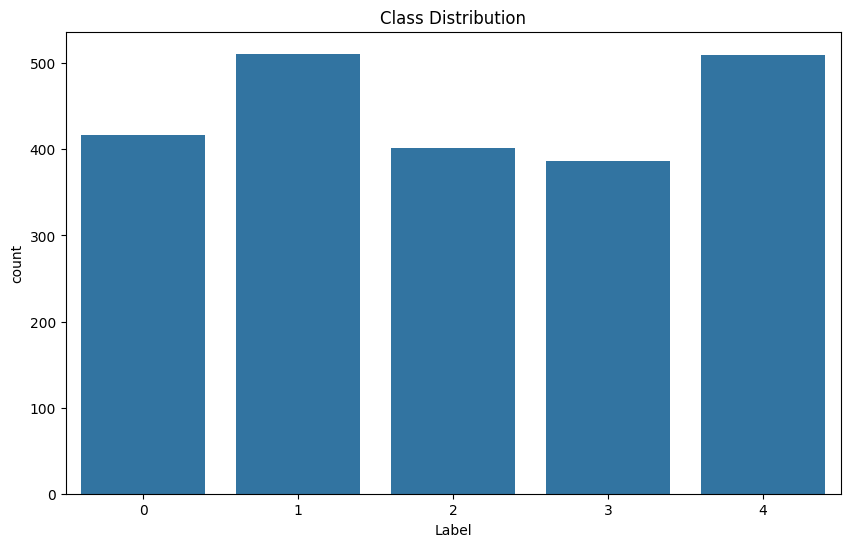

In [32]:
# Visualize class distribution using Class Labels
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution')
plt.show()

### Step 2: MultinomialNB Implementation (Best for Text Data)

* We'll use `CountVectorizer` to convert the text articles into a matrix of word counts. 

* This is the standard procedure for preparing text data for `MultinomialNB`, as the algorithm works with discrete features (counts).

In [24]:
# Split the data into features (X) and target (y)
X_text = df['Text']
y = df['Label']

# Split into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

In [25]:
# Initialize CountVectorizer
# We set a max_features to limit the vocabulary size for better performance.
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the training data, then transform the test data
X_train_counts = vectorizer.fit_transform(X_train_text)
X_test_counts = vectorizer.transform(X_test_text)

# Print the vocabulary size
print("Vocabulary size:", len(vectorizer.vocabulary_))

Vocabulary size: 1000


In [26]:
# Display the shape of the training and test feature matrices
X_train_counts.shape, X_test_counts.shape

((1780, 1000), (445, 1000))

In [27]:
# Train MultinomialNB model
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)

# Make predictions
y_pred_mnb = mnb.predict(X_test_counts)

In [28]:
# Evaluate the model
print("\nMultinomialNB Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb):.2f}")


MultinomialNB Performance:
Accuracy: 0.95


In [30]:
# Print classification report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_mnb))


Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95        92
           1       0.99      0.97      0.98        98
           2       0.93      0.91      0.92        77
           3       0.96      0.95      0.95        76
           4       0.93      0.95      0.94       102

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



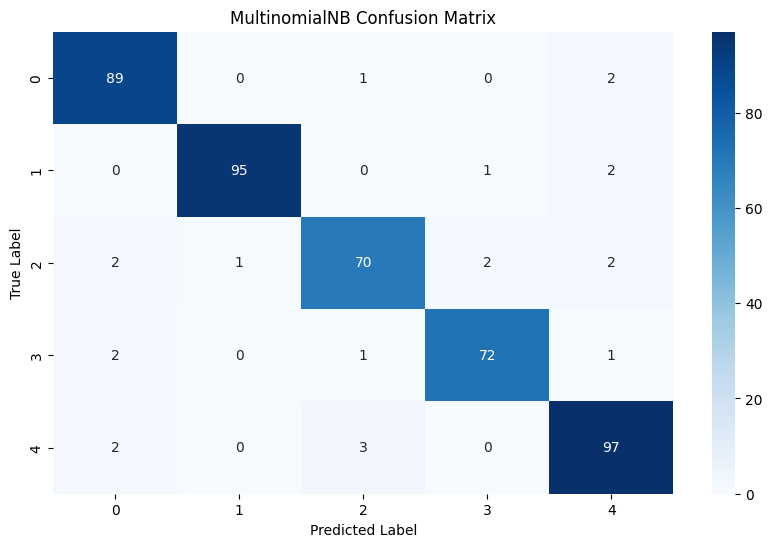

In [33]:
# Compute confusion matrix
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

# Visualize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MultinomialNB Confusion Matrix')
plt.show()

---

### Step 3: GaussianNB Implementation

* Since `GaussianNB` works best with continuous numerical features, we will engineer a simple feature from our text data: the length of the articles. 

* We will also include the number of unique words as a second feature. 

* This is a simple example to show how GaussianNB can be applied to a related but different type of data.

In [40]:
# Create new numerical features from the text data
df['text_length'] = df['Text'].apply(len)
df['unique_words'] = df['Text'].apply(lambda x: len(set(x.split())))

# Display the updated DataFrame
df.head()

,Text,Label,text_length,unique_words
0,Budget to set scene for election\n \n Gordon B...,0,3147,313
1,Army chiefs in regiments decision\n \n Militar...,0,3026,271
2,Howard denies split over ID cards\n \n Michael...,0,3167,295
3,Observers to monitor UK election\n \n Minister...,0,3094,294
4,Kilroy names election seat target\n \n Ex-chat...,0,2614,257


In [41]:
# Select the new features for GaussianNB
X_numerical = df[['text_length', 'unique_words']]
y = df['Label']

# Split the numerical data into training and testing sets
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

In [42]:
# Train GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train_num, y_train_num)

# Make predictions
y_pred_gnb = gnb.predict(X_test_num)

In [43]:
# Evaluate the model
print("\nGaussianNB Performance:")
print(f"Accuracy: {accuracy_score(y_test_num, y_pred_gnb):.2f}")


GaussianNB Performance:
Accuracy: 0.31


In [38]:
print("\nClassification Report:\n\n", classification_report(y_test_num, y_pred_gnb))


Classification Report:

               precision    recall  f1-score   support

           0       0.38      0.20      0.26        92
           1       0.49      0.24      0.33        98
           2       0.31      0.23      0.27        77
           3       0.00      0.00      0.00        76
           4       0.27      0.75      0.39       102

    accuracy                           0.31       445
   macro avg       0.29      0.29      0.25       445
weighted avg       0.30      0.31      0.26       445



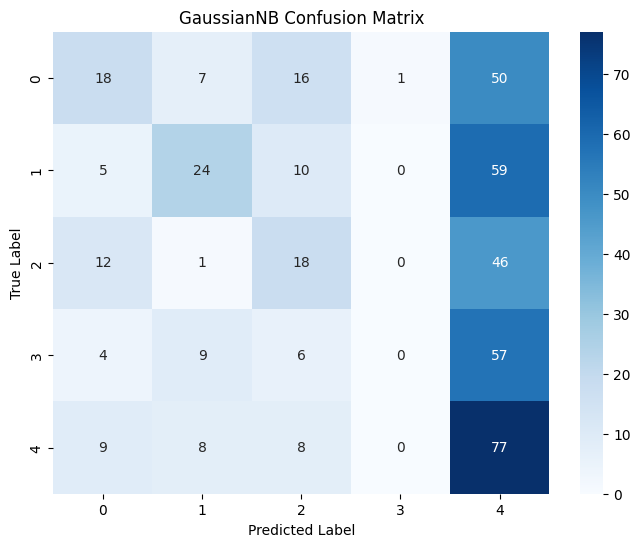

In [39]:
# Calculate the confusion matrix
conf_matrix_gnb = confusion_matrix(y_test_num, y_pred_gnb)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('GaussianNB Confusion Matrix')
plt.show()

### Step 4: Manual Prediction Tasks

* Now let's use our trained models to predict the category of a few manually created news articles. 

* This demonstrates a real-world use case.

In [44]:
new_articles = [
    'The central bank has announced a new policy to combat inflation, affecting interest rates.', # business
    'A new superhero movie topped the box office, grossing millions on its opening weekend.', # entertainment
    'A famous athlete scored a decisive goal in the final minutes of the match, securing a historic win.', # sport
    'Scientists are developing a new type of battery that promises to revolutionize electric vehicle technology.', # tech
    'A new bill was passed by the parliament, causing a major shift in national governance.', # politics
]

* new_articles: It contains different categories of text data
* Label: It contains labels for five different categories : 0,1,2,3,4

  * Politics = 0
  * Sport = 1
  * Technology = 2
  * Entertainment =3
  * Business = 4

In [45]:
# Make predictions with MultinomialNB
print("\n--- Predictions with MultinomialNB ---")
# Vectorize the new articles using the *same* fitted CountVectorizer
new_articles_counts = vectorizer.transform(new_articles)
predictions_mnb = mnb.predict(new_articles_counts)

for article, prediction in zip(new_articles, predictions_mnb):
    print(f"Article: '{article[:50]}...' -> Predicted Category: {prediction}")


--- Predictions with MultinomialNB ---
Article: 'The central bank has announced a new policy to com...' -> Predicted Category: 4
Article: 'A new superhero movie topped the box office, gross...' -> Predicted Category: 3
Article: 'A famous athlete scored a decisive goal in the fin...' -> Predicted Category: 1
Article: 'Scientists are developing a new type of battery th...' -> Predicted Category: 2
Article: 'A new bill was passed by the parliament, causing a...' -> Predicted Category: 0


In [53]:
# Make predictions with GaussianNB
print("\n--- Predictions with GaussianNB ---")
# Engineer features for the new articles for GaussianNB
new_articles_num = pd.DataFrame({
    'text_length': [len(x) for x in new_articles],
    'unique_words': [len(set(x.split())) for x in new_articles]
})

predictions_gnb = gnb.predict(new_articles_num)

for article, prediction in zip(new_articles, predictions_gnb):
    print(f"Article: '{article[:50]}...' -> Predicted Category: {prediction}")


--- Predictions with GaussianNB ---
Article: 'The central bank has announced a new policy to com...' -> Predicted Category: 3
Article: 'A new superhero movie topped the box office, gross...' -> Predicted Category: 3
Article: 'A famous athlete scored a decisive goal in the fin...' -> Predicted Category: 3
Article: 'Scientists are developing a new type of battery th...' -> Predicted Category: 3
Article: 'A new bill was passed by the parliament, causing a...' -> Predicted Category: 3


### Summary 

* Based on the results, we can draw the following conclusions:

  1.  **MultinomialNB Performance**: As expected, the `MultinomialNB` model performed exceptionally well on this task. 
      * Its accuracy was very high, and the confusion matrix shows that it correctly classified almost all documents. 
      * This is because MultinomialNB is designed to work with word count features, which are highly discriminative for text classification problems. 
      * The model effectively learns the probability of a word appearing in a certain category.

  2.  **GaussianNB Performance**: The `GaussianNB` model, while a valid classification algorithm, did not perform as well. 
      * This is because the features we engineered (text length and number of unique words) are not as rich or informative as the full Bag-of-Words representation used by `MultinomialNB`. 
      * The model struggled to differentiate between the categories based on these simple numerical features, leading to lower accuracy.

  3.  **Key Takeaways**: 
      * The choice of Naive Bayes variant is crucial and depends on the type of data you have. For discrete count data like word counts in text, `MultinomialNB` is the ideal choice.
      * For continuous data that can be assumed to follow a normal distribution, `GaussianNB` is more suitable.
      * In the case of text classification, a single numerical feature like text length is a poor substitute for the full word count vector, as it loses most of the semantic information crucial for accurate classification.
      * This exercise highlights the importance of matching the algorithm to the data type. While both are Naive Bayes classifiers, their underlying assumptions and applications are different.

---

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)